<h1> Checkpoint 02 - 2° semestre </h1>

**Python e OpenCV**

*   Segmentando uma imagem
*   Contornos de segmentos de uma imagem
*   Área e centro de massa de uma imagem
*   Criação de retas
*   Cálculo de ângulo de inclinação de uma reta

<h2> Segmentando uma imagem </h2>

Utilização da função HoughCircles, de Hough Circle Transform da OpenCV, para segmentar apenas os círculos maiores da imagem. 


In [1]:
# Fazendo as importações necessárias das bibliotecas do OpenCV e do Python

%matplotlib inline
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import math

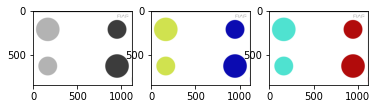

In [2]:
img = cv.imread('circulo.png', 0)    # importando a imagem em escala de cinza
img_rgb = cv.imread('circulo.png')   # importando a imagem em bgr
cimg = cv.cvtColor(img_rgb,cv.COLOR_RGB2BGR) 


plt.subplot(131); plt.imshow(img, cmap="gray") 
plt.subplot(132); plt.imshow(img_rgb)
plt.subplot(133); plt.imshow(cimg)
plt.show()

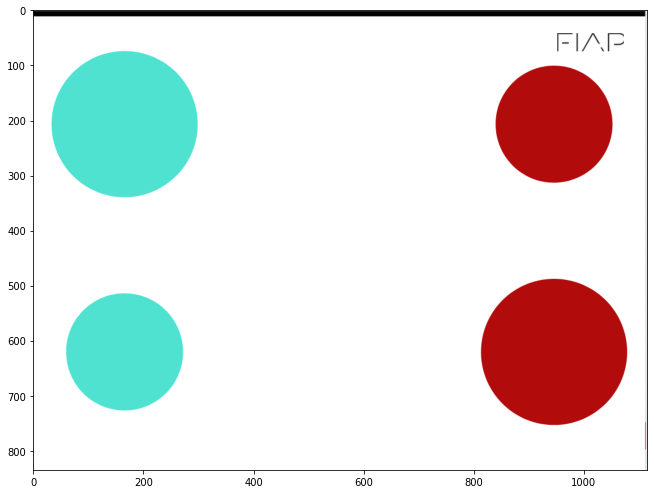

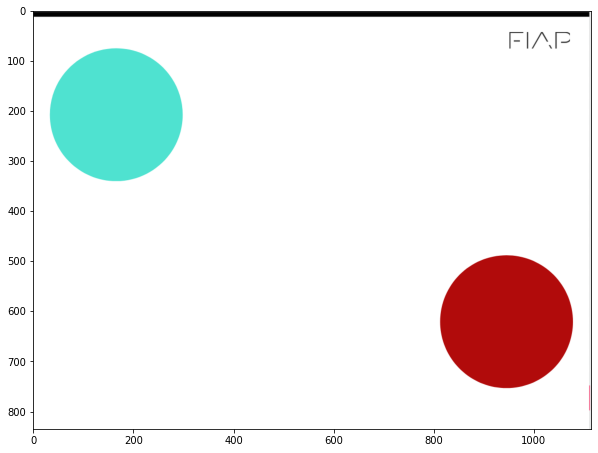

In [3]:
plt.figure(figsize=(11,11));plt.imshow(cimg);

#  Usando a função HoughCircles para reconhecer os círculos na imagem
#  Os parâmetros min e max Radius configuram o tamanho mínimo e máximo do raio dos círculos para pegar apenas os menores
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20, param1=50, param2=30,minRadius=0,maxRadius=110)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # criando um círculo na cor branca a partir do centro dos círculos para cobri-los e mostrar na imagem apenas os maiores
    cv.circle(cimg,(i[0],i[1]),2,(255, 255, 255), 250)

# definindo uma variável para configurar o tamanho de exibição das imagens pois será usado em várias células
figsize = (10,10)
    
plt.figure(figsize=figsize); plt.imshow(cimg)
plt.show()

<h2> Contornos de uma imagem </h2>

Com a função findContours, é possível encontrar todos os contornos para depois filtrar apenas os dos círculos e calcular as áreas deles com a função contourArea.

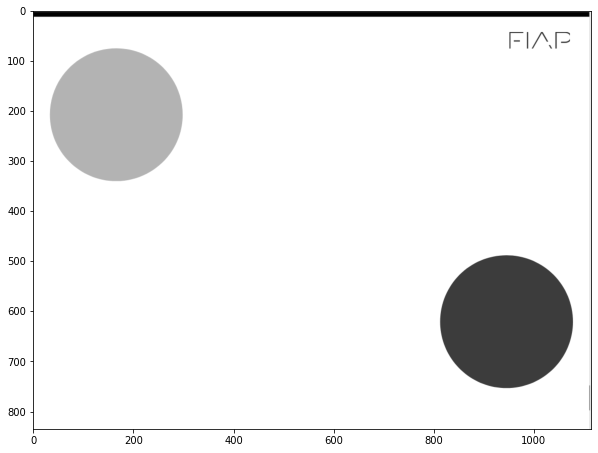

In [4]:
cimgGray = cv.cvtColor(cimg,cv.COLOR_RGB2GRAY)  #convertendo a imagem para escala de cinza

plt.figure(figsize=figsize); plt.imshow(cimgGray, cmap="gray")
plt.show()


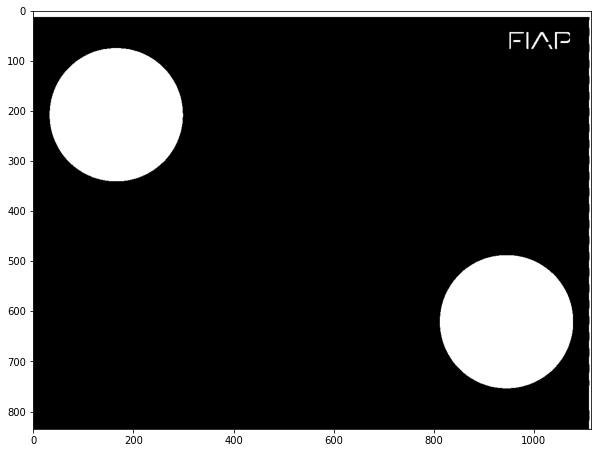

In [5]:
image_lower = np.array([0])
image_upper = np.array([254])

mask_hsv = cv.inRange(cimgGray, image_lower, image_upper)

plt.figure(figsize=figsize); plt.imshow(mask_hsv, cmap="gray")
plt.show()

In [6]:
contornos, _ = cv.findContours(mask_hsv, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

print("Contornos encontrados: ", len(contornos))
# são encontrados 10 contornos, considerando os dos círculos e as letras e as bordas do nome FIAP")

Contornos encontrados:  10


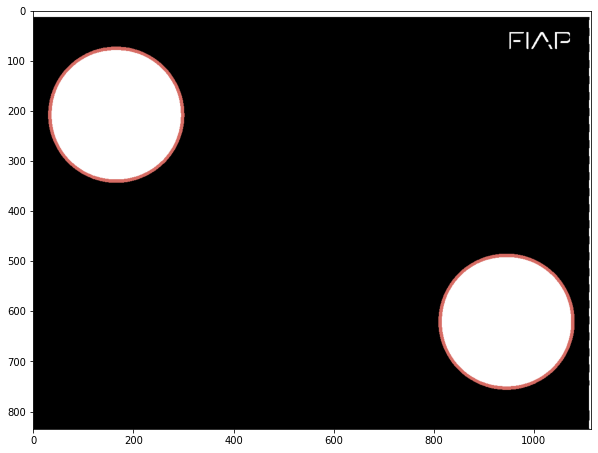

In [7]:
mask_rgb = cv.cvtColor(mask_hsv, cv.COLOR_GRAY2RGB)
contornos_img = mask_rgb.copy()

# é necessário filtrar os contornos e mostrar na imagem apenas os dos círculos
circles = []

# armazenando os valores das áreas dos círculos para usar depois
areas = []
maior = 0
for c in contornos:
    area = cv.contourArea(c)
    if area > maior:
        circles.append(c)
        maior = area
        areas.append(area)

cont_img = cv.drawContours(contornos_img, circles, -1, [215, 108, 100], 5);

plt.figure(figsize=figsize); plt.imshow(cont_img);
plt.show;

<h2> Cálculo do centro de massa </h2>

Com os contornos dos círculos encontrados, realiza-se o cálculo de centro de massa. O resultado é uma imagem com a marcação no centro indicando o CM e o valor da área.

Centro de massa do círculo 1 na posição: 620 945
Centro de massa do círculo 2 na posição: 206 165


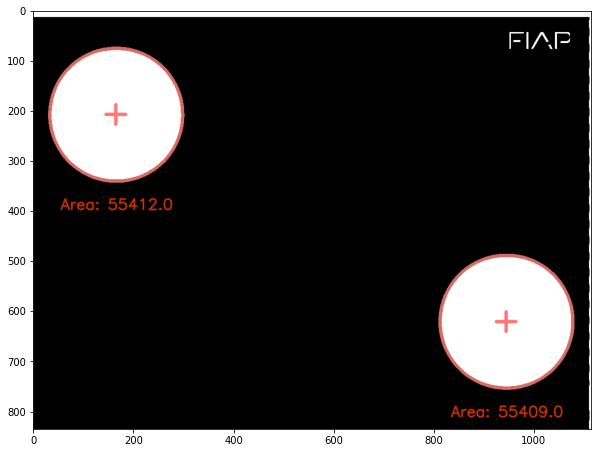

In [8]:
cont = 0
size = 20
color = (255,120,120)
font = cv.FONT_HERSHEY_SIMPLEX

#armazenando os centros de massa dos círculos para usar depois
cms = []

for c in circles:
    cont += 1 
    cnt = c
    M = cv.moments(cnt)

    # cálculo de centro de massa
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    cms.append([cx, cy])

    print(f'Centro de massa do círculo {cont} na posição:',cy,cx)
    
    cv.line(cont_img,(cx - size,cy),(cx + size,cy),color,5)
    cv.line(cont_img,(cx, cy - size),(cx, cy + size),color,5)
    
    # configurando para mostrar a respectiva àrea logo abaixo de cada círculo
    origem = (cx-110, cy+190)
    
    if cont == 1:
        text = areas[0]
    if cont == 2:
        text = areas[1]
        
    cv.putText(cont_img, str(f'Area: {text}'), origem, font,1,(200,50,0),2,cv.LINE_AA)
    
plt.figure(figsize=figsize);
plt.imshow(cont_img);
plt.show;

<h2>Criando retas em uma imagem</h2>

Foi adicionada uma reta entre os dois centros de massa encontrados, utilizando a função line para configurar o ponto de início, final, a cor e a espessura da reta, além, claro, da imagem onde será adicionada.

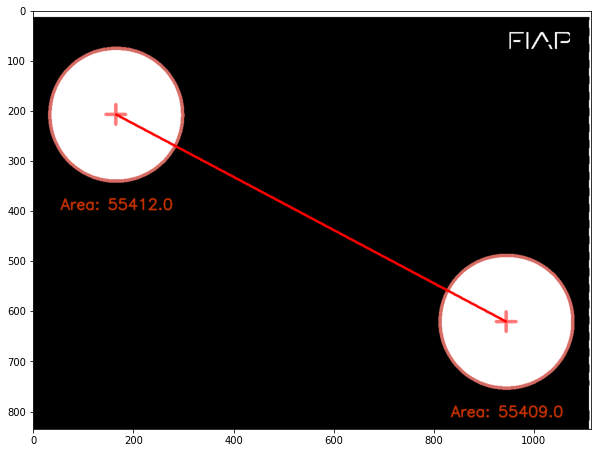

In [9]:
cont = 0
for i in cms:
    cont += 1
    if cont == 1:
        start = (i[0], i[1])
    if cont == 2:
        end = (i[0], i[1])
        
cv.line(cont_img, start, end, (255, 0, 0), 4)
    
plt.figure(figsize=figsize);
plt.imshow(cont_img);
plt.show;

<h2>Calculando o ângulo de inclinação</h2>

Por fim, é feito um cálculo com a utilização de uma fórmula para calcular, a partir de três pontos, o ângulo de inclinação da reta em relação ao plano horizontal.

Ângulo de inclinação da reta em relação ao plano horizontal: 27.96°


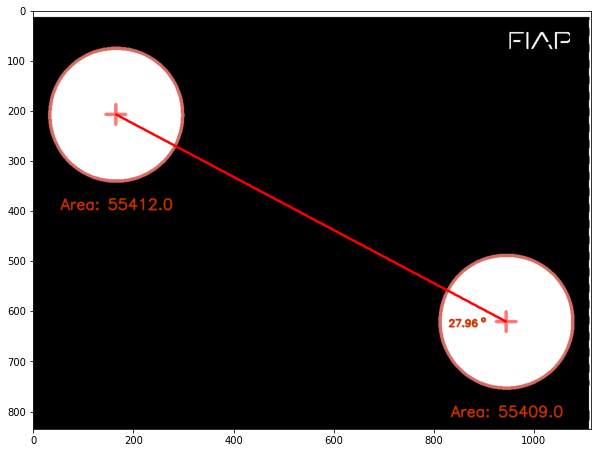

In [10]:
third_point = end[0], start[1]

def gradient(pt1,pt2):
    return (pt2[1]-pt1[1])/(pt2[0]-pt1[0])

m1 = gradient(third_point, start)
m2 = gradient(start, end)
angR = math.atan((m2-m1)/(1+(m1*m2)))
angD = round(math.degrees(angR),2)

print(f'Ângulo de inclinação da reta em relação ao plano horizontal: {angD}°')

angulo = start[0] - 115, start[1] + 10
graus = start[0] - 50, start[1]

cv.putText(cont_img, str(f'{angD}'), angulo, font,.65,(200,50,0),2,cv.LINE_AA)
cv.putText(cont_img, str(f'o'), graus, font,.5,(200,50,0),2,cv.LINE_AA)

plt.figure(figsize=figsize);
plt.imshow(cont_img);
plt.show;